### Feature extraction of eigen face

In [2]:
import  numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## Eigen face
from sklearn.decomposition import PCA
import pickle

In [5]:
## Load the data
data=pickle.load(open(r'C:\Users\dell\Desktop\Minor_project_facerec\face\2_Train_FaceRecognition_with_ML\data/data_images_100_100.pickle', mode='rb'))

In [6]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431,female
1,0.917647,0.925490,0.921569,0.945098,0.776471,0.729412,0.447059,0.062745,0.176471,0.137255,...,0.070588,0.070588,0.066667,0.082353,0.113725,0.090196,0.121569,0.156863,0.149020,female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,female
3,0.537255,0.501961,0.447059,0.376471,0.376471,0.372549,0.364706,0.447059,0.588235,0.639216,...,0.207843,0.266667,0.262745,0.290196,0.360784,0.380392,0.403922,0.400000,0.376471,female
4,0.917647,0.925490,0.905882,0.905882,0.905882,0.725490,0.556863,0.435294,0.203922,0.176471,...,0.941176,0.925490,0.929412,0.937255,0.929412,0.929412,0.949020,0.945098,0.945098,female


In [7]:
data.shape

(4317, 10001)

In [9]:
#Mean space
X=data.drop('gender',axis=1).values
X.shape

(4317, 10000)

In [10]:
X

array([[0.78431373, 0.74117647, 0.7372549 , ..., 0.45882353, 0.4627451 ,
        0.47843137],
       [0.91764706, 0.9254902 , 0.92156863, ..., 0.12156863, 0.15686275,
        0.14901961],
       [0.19215686, 0.19215686, 0.1372549 , ..., 0.83137255, 0.82352941,
        0.81568627],
       ...,
       [0.69411765, 0.70196078, 0.70588235, ..., 0.61960784, 0.65098039,
        0.6745098 ],
       [0.14509804, 0.14509804, 0.14509804, ..., 0.27843137, 0.28235294,
        0.27843137],
       [0.71372549, 0.71764706, 0.72156863, ..., 0.74509804, 0.74509804,
        0.74509804]], shape=(4317, 10000))

In [11]:
mean_face=X.mean(axis=0) #flatten mean face
mean_face.shape

(10000,)

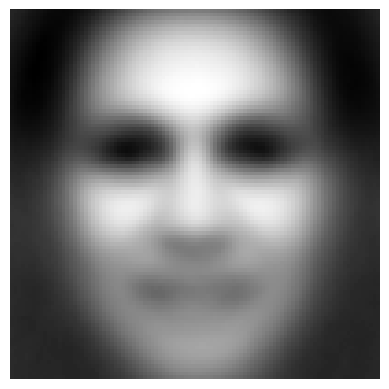

In [13]:
#Visualize mean face
plt.imshow(mean_face.reshape((100,100)), cmap='gray')
plt.axis('off')
plt.show()

### Subtract data from mean face

In [14]:
X_t=X-mean_face #transform data

In [15]:
pca=PCA(n_components=None, whiten=True, svd_solver='auto')
pca.fit(X_t)

,n_components,None
,copy,True
,whiten,True
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [19]:
exp_var_df=pd.DataFrame()
exp_var_df['Explained_var']=pca.explained_variance_ratio_
exp_var_df['cumexplained_var']=exp_var_df['Explained_var'].cumsum()
exp_var_df['principal_components']=np.arange(1,len(exp_var_df)+1)
exp_var_df.head()

,Explained_var,cumexplained_var,principal_components
0,0.251372,0.251372,1
1,0.114452,0.365824,2
2,0.104980,0.470804,3
3,0.052181,0.522985,4
4,0.033115,0.556100,5


In [20]:
exp_var_df.set_index('principal_components', inplace=True)

<Axes: xlabel='principal_components'>

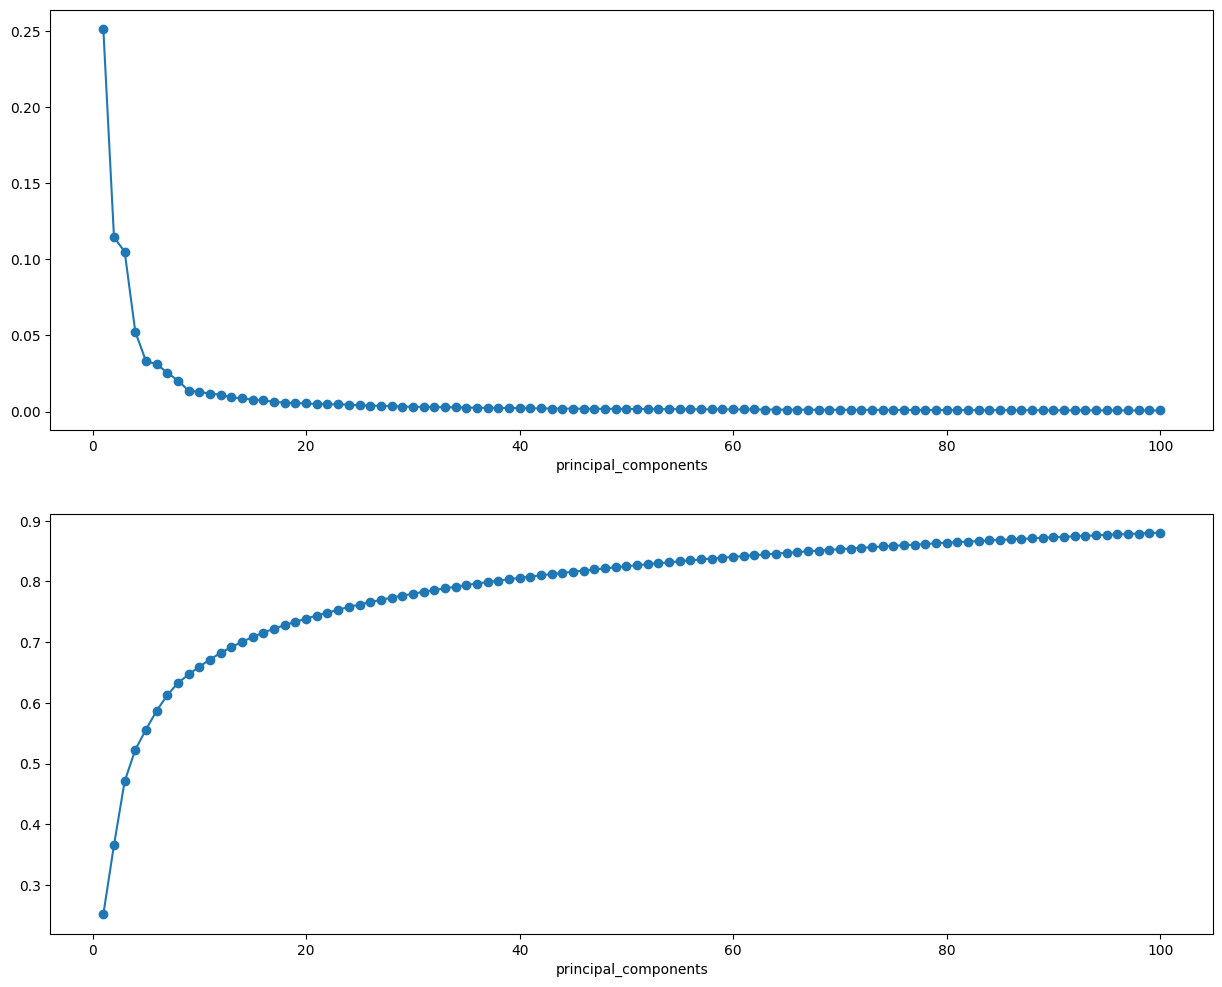

In [25]:
fig,ax=plt.subplots(nrows=2,figsize=(15,12))

exp_var_df['Explained_var'].head(100).plot(kind='line',marker='o', ax=ax[0])
exp_var_df['cumexplained_var'].head(100).plot(kind='line',marker='o', ax=ax[1])

In [26]:
pca_50=PCA(n_components=50, whiten=True,svd_solver='auto')
pca_data=pca_50.fit_transform(X_t)

In [27]:
pca_data.shape

(4317, 50)

In [31]:
#saving data and model
y=data['gender'].values
np.savez(r'C:\Users\dell\Desktop\Minor_project_facerec\face\2_Train_FaceRecognition_with_ML\data/data_pca_50_target', pca_data,y)

In [32]:
#saving the model
pca_dict={'pca':pca_50,'mean_face':mean_face}

In [33]:
pickle.dump(pca_dict,open(r'C:\Users\dell\Desktop\Minor_project_facerec\face\2_Train_FaceRecognition_with_ML\model/pca_dict.pickle', 'wb'))

### Visualize the eigen image

In [35]:
pca_data.shape

(4317, 50)

In [37]:
pca_data_inv=pca_50.inverse_transform(pca_data)

In [38]:
pca_data_inv.shape

(4317, 10000)

In [39]:
eig_img=pca_data_inv[0,:].reshape((100,100))
eig_img.shape

(100, 100)

(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

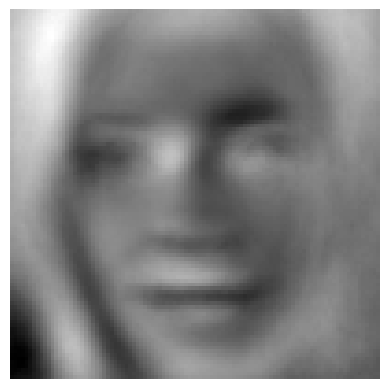

In [40]:
plt.imshow(eig_img, cmap='gray')
plt.axis('off')

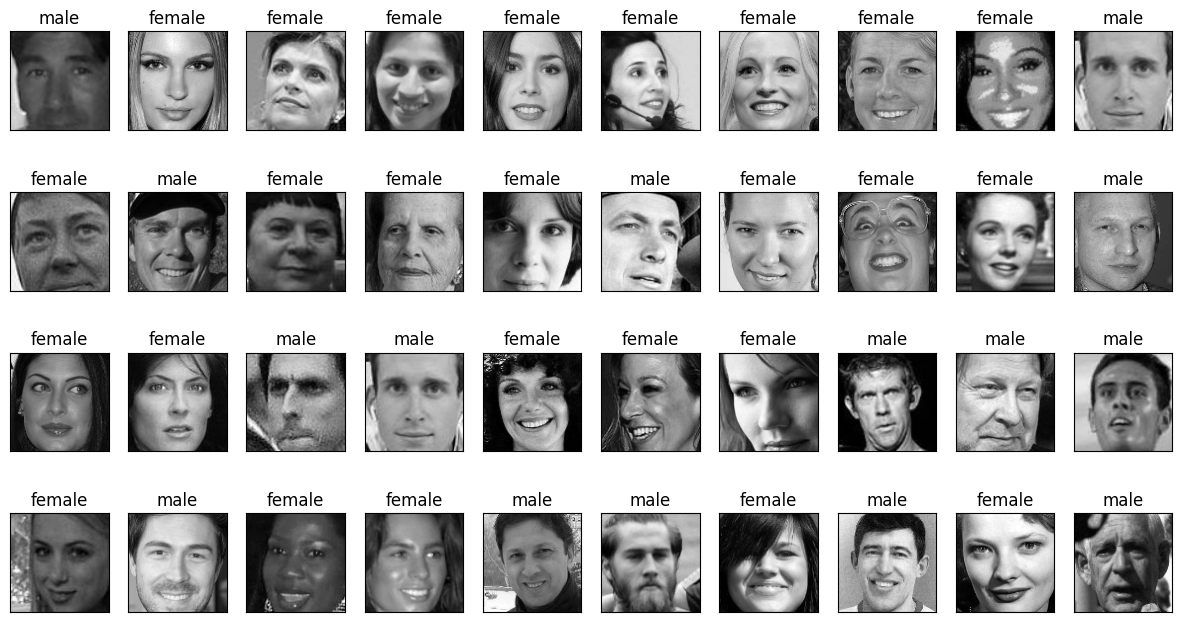

====================Eigen Images====================


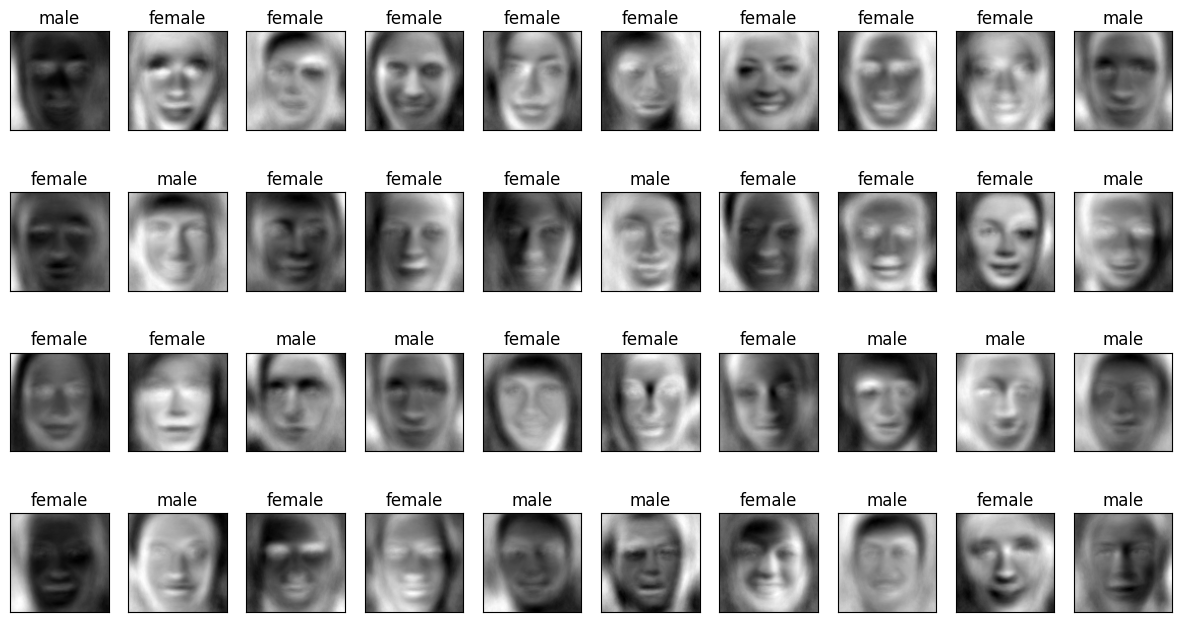

In [41]:
np.random.seed(1001)
pics = np.random.randint(0,4319,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()